<a href="https://colab.research.google.com/github/Xenoprad/Align_genes/blob/main/Protein_%26_Nucleic_acid_Sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1] # Multiple Sequence Alignment of Cytochrome c Protein and Nucleotide Sequences


In [ ]:
!pip install Biopython
!apt-get install -y clustalo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 39.6 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libargtable2-0
The following NEW packages will be installed:
  clustalo libargtable2-0
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 273 kB of archives.
After this operation, 694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libargtable2-0 amd64 13-1.1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 clustalo amd64 1.2.4-7 [259 kB]
Fetched 273 kB in 0s (606 kB/s)
Selecting previously unselected package libargtable2-0.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../libargtable2-0_13-1.1_amd64.deb ...
Unpacking libargtable2-0 (13-1.1) ...
Selecting previously unselected package clustalo.
Preparing to unpack .

In [ ]:
#Step 2:Import modules
from Bio import SeqIO, AlignIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from collections import Counter
import subprocess

In [ ]:
# Step 3: Define Protein Sequences and write to FASTA files

# We use three cytochrome c protein sequences from different species for alignment. These are:
# - Human (*Homo sapiens*)
# - Chimpanzee (*Pan troglodytes*)
# - Mouse (*Mus musculus*)

sequences = [
    SeqRecord(Seq("MVLTIYPDELVQIVSDKK"), id="seq1", description=""),
    SeqRecord(Seq("MVLTIYPDELVQIVTDKK"), id="seq2", description=""),
    SeqRecord(Seq("MVLTVYPDELVQIVSDKK"), id="seq3", description="")
]

fasta_file = "input_sequences.fasta"
with open(fasta_file, "w") as f:
    SeqIO.write(sequences, f, "fasta")

In [ ]:
#Step 4: Run Clustal Omega aligmnet
aligned_file = "aligned_output.fasta"
command = f"clustalo -i {fasta_file} -o {aligned_file}"
subprocess.run(command, shell=True)

CompletedProcess(args='clustalo -i input_sequences.fasta -o aligned_output.fasta', returncode=0)

In [ ]:
#Step 5 :Read and display aligned sequences
alignment = AlignIO.read(aligned_file, "fasta")
print("\nAligned Sequences:")
for record in alignment:
    print(f"{record.id}: {record.seq}")


Aligned Sequences:
seq1: MVLTIYPDELVQIVSDKK
seq2: MVLTIYPDELVQIVTDKK
seq3: MVLTVYPDELVQIVSDKK


In [ ]:
#Step 6: Save aligned sequences in CLUSTAL format
AlignIO.write(alignment,"aligned_output.aln", "clustal")

1

In [ ]:
# Step 7: Identify conserved positions
print("\nConserved Positions:")
for i in range(len(alignment[0].seq)):
    column = [record.seq[i] for record in alignment]
    counts = Counter(column)
    if len(counts) == 1:
      print(f"Position {i+1}: {column[0]}")


Conserved Positions:
Position 1: M
Position 2: V
Position 3: L
Position 4: T
Position 6: Y
Position 7: P
Position 8: D
Position 9: E
Position 10: L
Position 11: V
Position 12: Q
Position 13: I
Position 14: V
Position 16: D
Position 17: K
Position 18: K


In [ ]:
# Step 8: Heatmap of conservation across alignment
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Build a matrix of character frequencies per column
alignment_array = np.array([list(rec.seq) for rec in alignment])
num_seqs, seq_len = alignment_array.shape

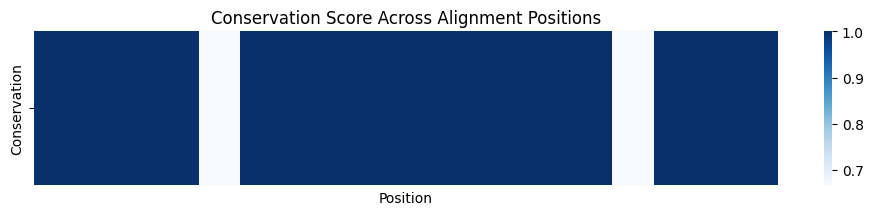

In [ ]:
# Count most common characters per column
conservation_scores = []
for i in range(seq_len):
    column = alignment_array[:, i]
    counts = Counter(column)
    most_common = counts.most_common(1)[0][1]
    score = most_common / num_seqs
    conservation_scores.append(score)

#Plot conservation
plt.figure(figsize=(12, 2))
sns.heatmap([conservation_scores], cmap="Blues", cbar=True, xticklabels=False, yticklabels=["Conservation"])
plt.xlabel("Position")
plt.title("Conservation Score Across Alignment Positions")
plt.show()

## Conclusion

- All three sequences used in this assignment represent partial protein sequences of cytochrome c.
- Cytochrome c is involved in the mitochondrial electron transport chain.
- The multiple sequence alignment shows conserved regions likely important for protein function.
- The conservation heatmap visually confirms high similarity among the sequences, especially near the N-terminal.

## Nucleic Acid Sequence Alignment using Clustal Omega
In this section, we align three DNA sequences to analyze their conservation and similarities.

In [ ]:
# Step 1: Install required packages (only needed in Google Colab)
!pip install biopython
!apt-get install -y clustalo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
clustalo is already the newest version (1.2.4-7).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
# Step 2: Import necessary libraries
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO, AlignIO
from collections import Counter
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Step 3: Define Cytochrome c Gene (DNA) Sequences

Below are the partial nucleotide coding sequences (CDS) of the **cytochrome c gene** from three different species:
- Human (*Homo sapiens*)
- Chimpanzee (*Pan troglodytes*)
- Mouse (*Mus musculus*)

In [ ]:
# Step 3: Define nucleic acid sequences for cytochrome c gene
# These are partial CDS regions of the cytochrome c gene from different species
dna_sequences = [
    SeqRecord(Seq("ATGGTTCTGACATTTATCCCGACGAGCTGGTGCAAATTGTCTGATAAAA"), id="dna_seq1", description="Cytochrome c - Human"),
    SeqRecord(Seq("ATGGTTCTGACATTTATCCCGACGAGCTGGTGCAAATTGTCTGATAAAG"), id="dna_seq2", description="Cytochrome c - Chimpanzee"),
    SeqRecord(Seq("ATGGTTCTGACATTTACCCCGACGAGCTGGTGCAAATTGTCTGATAAAA"), id="dna_seq3", description="Cytochrome c - Mouse")
]

In [ ]:
# Step 4: Write sequences to FASTA
dna_fasta_file = "dna_sequences.fasta"
with open(dna_fasta_file, "w") as f:
    SeqIO.write(dna_sequences, f, "fasta")


In [ ]:
# Step 5: Run Clustal Omega
aligned_dna_file = "dna_aligned_output.fasta"
command = f"clustalo -i {dna_fasta_file} -o {aligned_dna_file}"
subprocess.run(command, shell=True)

CompletedProcess(args='clustalo -i dna_sequences.fasta -o dna_aligned_output.fasta', returncode=0)

In [ ]:
# Step 6: Read aligned output
dna_alignment = AlignIO.read(aligned_dna_file, "fasta")
print("\nDNA Aligned Sequences:")
for record in dna_alignment:
    print(f"{record.id}: {record.seq}")


DNA Aligned Sequences:
dna_seq1: ATGGTTCTGACATTTATCCCGACGAGCTGGTGCAAATTGTCTGATAAAA
dna_seq2: ATGGTTCTGACATTTATCCCGACGAGCTGGTGCAAATTGTCTGATAAAG
dna_seq3: ATGGTTCTGACATTTACCCCGACGAGCTGGTGCAAATTGTCTGATAAAA


In [ ]:
# Step 7: Identify conserved positions
print("\nConserved Positions:")
for i in range(len(dna_alignment[0].seq)):
    column = [record.seq[i] for record in dna_alignment]
    counts = Counter(column)
    if len(counts) == 1:
        print(f"Position {i+1}: {column[0]}")


Conserved Positions:
Position 1: A
Position 2: T
Position 3: G
Position 4: G
Position 5: T
Position 6: T
Position 7: C
Position 8: T
Position 9: G
Position 10: A
Position 11: C
Position 12: A
Position 13: T
Position 14: T
Position 15: T
Position 16: A
Position 18: C
Position 19: C
Position 20: C
Position 21: G
Position 22: A
Position 23: C
Position 24: G
Position 25: A
Position 26: G
Position 27: C
Position 28: T
Position 29: G
Position 30: G
Position 31: T
Position 32: G
Position 33: C
Position 34: A
Position 35: A
Position 36: A
Position 37: T
Position 38: T
Position 39: G
Position 40: T
Position 41: C
Position 42: T
Position 43: G
Position 44: A
Position 45: T
Position 46: A
Position 47: A
Position 48: A


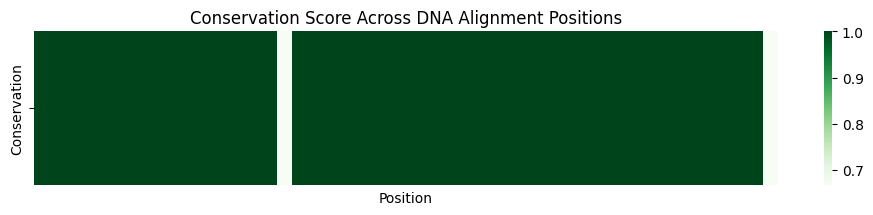

In [ ]:
# Step 8: Plot conservation heatmap
alignment_array = np.array([list(rec.seq) for rec in dna_alignment])
num_seqs, seq_len = alignment_array.shape

conservation_scores = []
for i in range(seq_len):
    column = alignment_array[:, i]
    counts = Counter(column)
    most_common = counts.most_common(1)[0][1]
    score = most_common / num_seqs
    conservation_scores.append(score)

plt.figure(figsize=(12, 2))
sns.heatmap([conservation_scores], cmap="Greens", cbar=True, xticklabels=False, yticklabels=["Conservation"])
plt.xlabel("Position")
plt.title("Conservation Score Across DNA Alignment Positions")
plt.show()

## Conclusion (DNA Alignment)

- The DNA sequences represent partial coding regions of the cytochrome c gene from three species.
- The alignment shows high conservation across most positions, especially between human and chimpanzee.
- The heatmap highlights conserved and variable regions, useful for studying evolutionary changes at the genetic level.